In [122]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [123]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [124]:
df1=df.drop(['area_type','availability','society','balcony'],axis='columns')


In [125]:
df1.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [126]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [127]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [128]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [129]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [132]:
df2['BHK']=df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6076\1797367896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [136]:
df2.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [134]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
def is_int(x):
    try:
        int(x)
    except:
        return False
    return True

In [138]:
df2[~(df2['total_sqft'].apply(is_float))].head(10)




,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [139]:
def convert(x):
    t=x.split('-')
    if(len(t)==2):
        return (float (t[0]) + float (t[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [140]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert)
df3['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [48]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [142]:
df4=df3.copy()
df4=df4[df4.total_sqft.notnull()]
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [148]:
df4['location']=df4['location'].apply(lambda x: x.strip())


In [149]:
df_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [150]:
df5_location_less=df_stats[df_stats<=10]
df5_location_less


location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [151]:
len(df4.location.unique())

1287

In [152]:
df4.location=df4.location.apply(lambda x: 'other' if x in df5_location_less else x )

In [153]:
df4.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [154]:
df4

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,other,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [156]:
df5=df4.copy()
df5['price_per_sqft']=df5.price*100000/df5.total_sqft
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [157]:
df5.groupby('location').price_per_sqft.mean()

location
1st Block Jayanagar          11496.236323
1st Phase JP Nagar           10154.472338
2nd Phase Judicial Layout     4048.701183
2nd Stage Nagarbhavi         17349.228395
5th Block Hbr Layout         12137.476027
                                 ...     
Yelahanka                     5395.045479
Yelahanka New Town            5756.231230
Yelenahalli                   4012.550871
Yeshwanthpur                  6981.015978
other                         9414.121141
Name: price_per_sqft, Length: 241, dtype: float64

In [158]:
df5.total_sqft.describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [159]:
df5.BHK.describe()

count    13200.000000
mean         2.800833
std          1.292843
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: BHK, dtype: float64

In [167]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]

In [169]:
df6.shape

(12456, 7)

In [171]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [173]:
def remove_outliers(df):
    df_1=pd.DataFrame()
    for k,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st)) ]
        df_1=pd.concat([df_1,reduced],ignore_index=True)
    return df_1
df7=remove_outliers(df6)
df7.shape

    

(10242, 7)

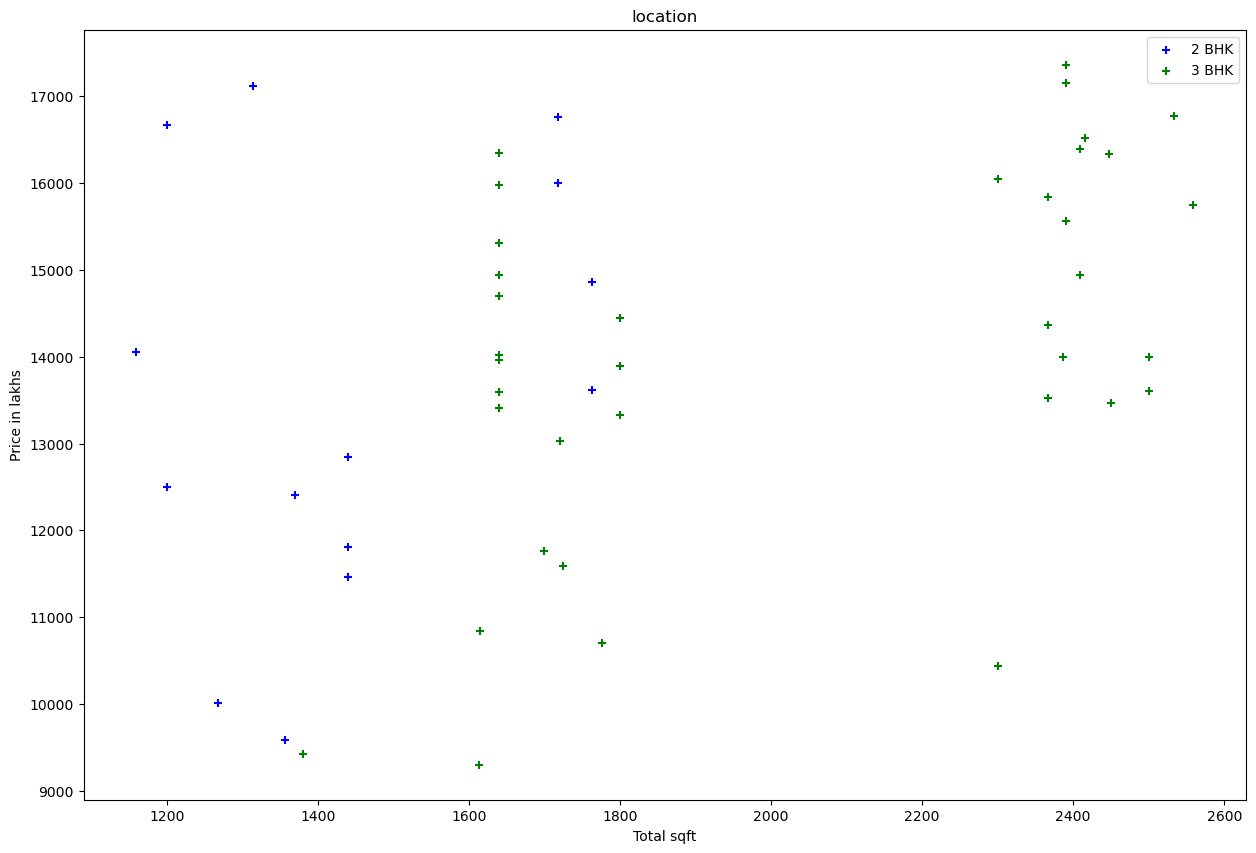

In [177]:
def plot_scatter(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location ) & (df.BHK==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',marker='+',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='green',marker='+',label='3 BHK')
    plt.xlabel('Total sqft')
    plt.ylabel('Price in lakhs')
    plt.title('location')
    plt.legend()
plot_scatter(df7,"Rajaji Nagar")

In [181]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            print("stats",stats)
            print("bhk",bhk)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

stats None
bhk 2
stats {'mean': 11983.805668016194, 'std': 0.0, 'count': 1}
bhk 3
stats {'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}
bhk 4
stats None
bhk 1
stats {'mean': 5952.380952380952, 'std': 0.0, 'count': 1}
bhk 2
stats {'mean': 7931.806799837383, 'std': 1534.1422783514054, 'count': 8}
bhk 3
stats {'mean': 9151.192151725822, 'std': 1054.731726021645, 'count': 7}
bhk 4
stats {'mean': 7537.92218148637, 'std': 1607.0591069513537, 'count': 3}
bhk 5
stats None
bhk 2
stats {'mean': 3851.8518518518517, 'std': 497.593660834978, 'count': 3}
bhk 3
stats None
bhk 4
stats None
bhk 6
stats None
bhk 2
stats {'mean': 4755.410708222867, 'std': 374.06419031565235, 'count': 3}
bhk 3
stats None
bhk 5
stats {'mean': 3611.1111111111113, 'std': 0.0, 'count': 1}
bhk 6
stats None
bhk 1
stats {'mean': 4628.623188405797, 'std': 371.376811594203, 'count': 2}
bhk 2
stats {'mean': 5067.359785883266, 'std': 453.24956183513086, 'count': 17}
bhk 3
stats None
bhk 5
stats None
bhk 2
stats {'m

stats None
bhk 2
stats {'mean': 5874.64951344219, 'std': 208.0884384424191, 'count': 3}
bhk 3
stats {'mean': 6639.764255543528, 'std': 469.4210339773065, 'count': 22}
bhk 4
stats None
bhk 2
stats {'mean': 5018.120021443538, 'std': 616.24268015249, 'count': 4}
bhk 3
stats {'mean': 5794.291811767968, 'std': 701.7168143003905, 'count': 7}
bhk 4
stats {'mean': 4562.5, 'std': 312.5, 'count': 2}
bhk 5
stats None
bhk 2
stats {'mean': 3938.0120307679967, 'std': 369.34106505379697, 'count': 12}
bhk 3
stats {'mean': 4582.331403008516, 'std': 552.308800975027, 'count': 8}
bhk 4
stats None
bhk 2
stats {'mean': 24166.666666666668, 'std': 0.0, 'count': 1}
bhk 3
stats None
bhk 5
stats None
bhk 2
stats {'mean': 6163.1658953574815, 'std': 1933.415341710632, 'count': 5}
bhk 3
stats {'mean': 6718.224920185002, 'std': 1116.5076173869681, 'count': 6}
bhk 4
stats None
bhk 2
stats {'mean': 6827.946263617467, 'std': 966.9691792014793, 'count': 8}
bhk 3
stats {'mean': 7143.374896079018, 'std': 1182.94305851678

stats None
bhk 2
stats {'mean': 6041.583372234744, 'std': 653.8682870762742, 'count': 6}
bhk 3
stats {'mean': 5916.740546308524, 'std': 721.5559950179522, 'count': 5}
bhk 4
stats None
bhk 2
stats {'mean': 5500.0, 'std': 0.0, 'count': 1}
bhk 3
stats None
bhk 1
stats {'mean': 5208.333333333333, 'std': 0.0, 'count': 1}
bhk 2
stats {'mean': 4651.883076314409, 'std': 642.90451560445, 'count': 13}
bhk 3
stats None
bhk 1
stats {'mean': 5646.853146853147, 'std': 646.8531468531469, 'count': 2}
bhk 2
stats {'mean': 5274.4401769080805, 'std': 359.1996745553106, 'count': 7}
bhk 3
stats None
bhk 1
stats {'mean': 4102.12346939793, 'std': 591.7443122845393, 'count': 9}
bhk 2
stats {'mean': 4390.756355620633, 'std': 671.539951835691, 'count': 30}
bhk 3
stats None
bhk 5
stats None
bhk 8
stats None
bhk 1
stats {'mean': 3416.085803355814, 'std': 180.47203987792676, 'count': 3}
bhk 2
stats {'mean': 4161.885658225768, 'std': 587.9649928204554, 'count': 20}
bhk 3
stats None
bhk 1
stats {'mean': 3250.0, 'std

stats None
bhk 3
stats {'mean': 11677.772648686641, 'std': 1164.2113099564785, 'count': 7}
bhk 4
stats None
bhk 1
stats {'mean': 2874.133538039441, 'std': 174.43064872118748, 'count': 4}
bhk 2
stats {'mean': 3604.54588824458, 'std': 718.1819172813347, 'count': 33}
bhk 3
stats {'mean': 4675.963272449762, 'std': 1139.724491656155, 'count': 20}
bhk 4
stats None
bhk 1
stats {'mean': 5133.293879111827, 'std': 1040.4585511011248, 'count': 9}
bhk 2
stats {'mean': 5376.764753392969, 'std': 940.2539293683719, 'count': 114}
bhk 3
stats {'mean': 6139.2129399546575, 'std': 1182.0586574859085, 'count': 145}
bhk 4
stats {'mean': 6462.746127334548, 'std': 1350.3205944520087, 'count': 24}
bhk 5
stats None
bhk 1
stats {'mean': 3195.945945945946, 'std': 0.0, 'count': 1}
bhk 2
stats {'mean': 2980.300110459942, 'std': 240.74806987622512, 'count': 6}
bhk 3
stats None
bhk 1
stats {'mean': 7556.675062972292, 'std': 0.0, 'count': 1}
bhk 2
stats {'mean': 6104.475872678937, 'std': 867.7629358050074, 'count': 4}

(7317, 7)

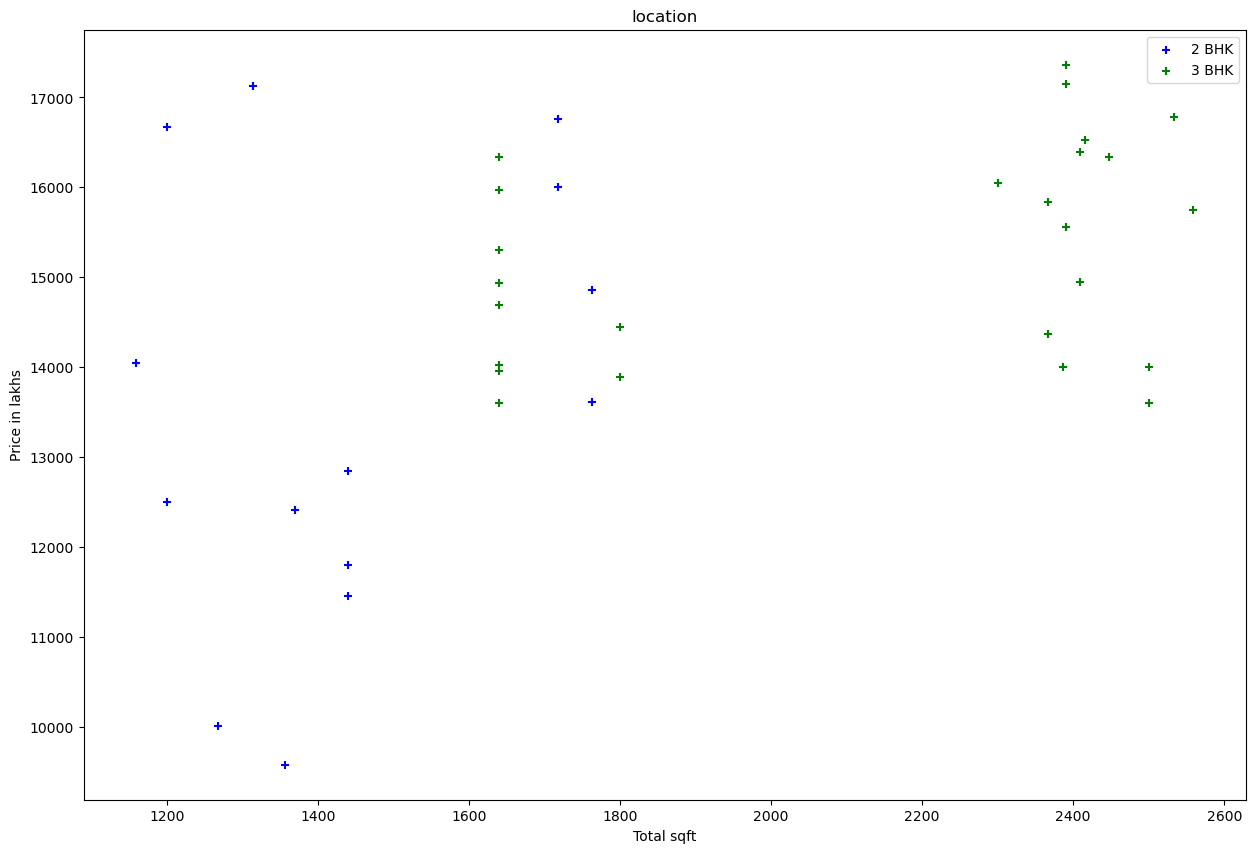

In [183]:
plot_scatter(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

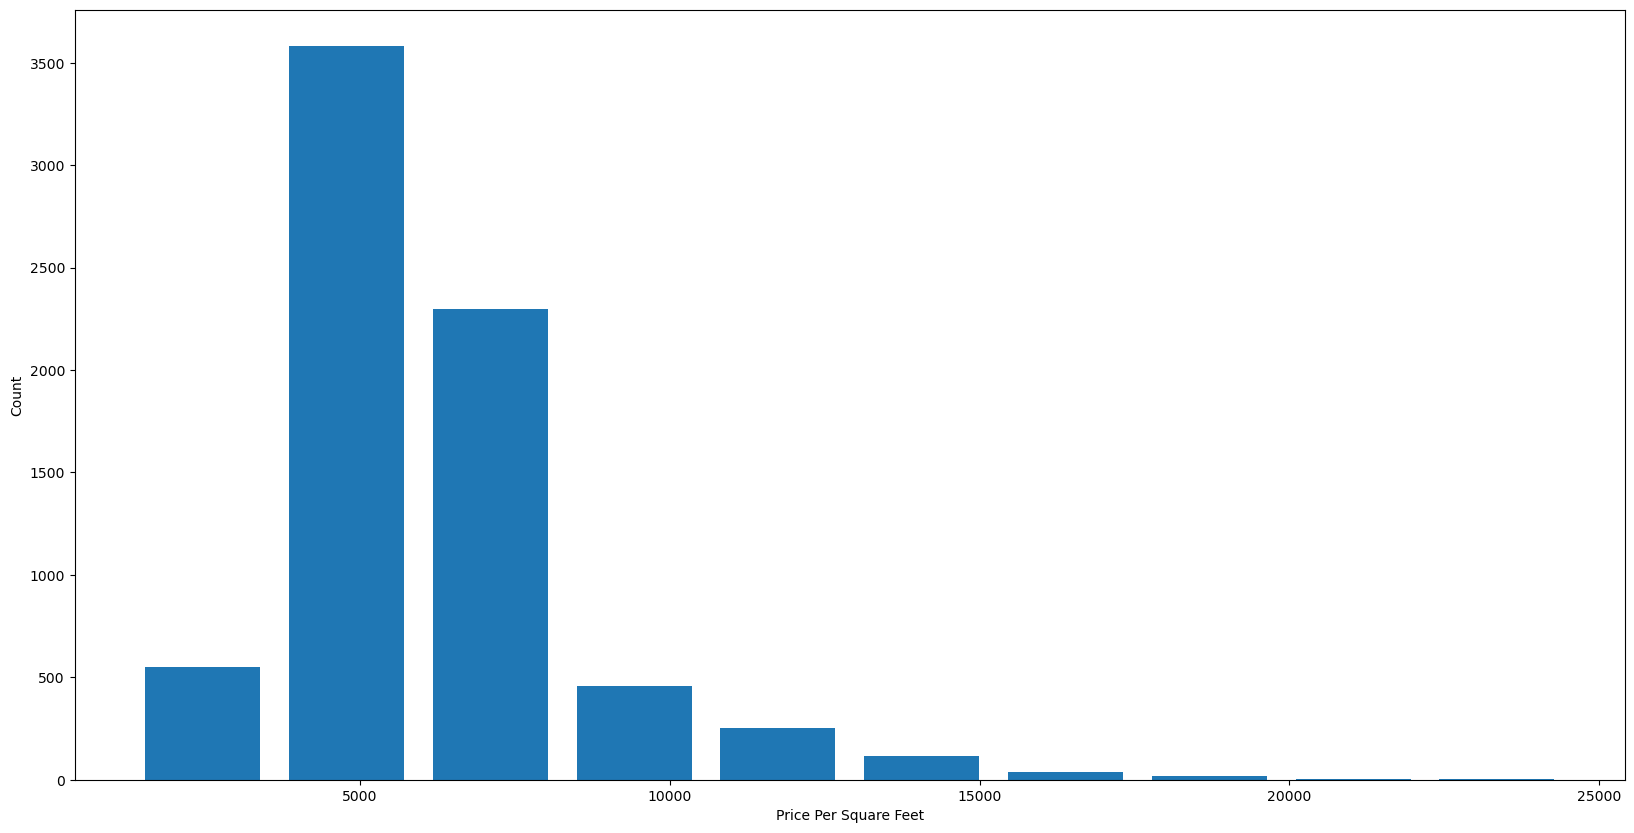

In [184]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [186]:
df8.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [188]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [191]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7239, 7)

In [192]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [202]:
dummies=pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
X=df12.drop('price',axis='columns')
y=df12.price

In [210]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
l=LinearRegression()


In [212]:
l.fit(X_train,y_train)

LinearRegression()

In [214]:
l.score(X_test,y_test)

0.8469451101896087

In [227]:
def predict(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    print(loc_index)
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return l.predict([x])[0]



In [230]:
predict('1st Block Jayanagar',1630,3,3)

3


C:\Users\Admin\sample_numpy\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


244.68164969272436

In [233]:
import pickle
with open('Bengaluru_House_Data_model.pickle','wb') as f:
    pickle.dump(l,f)

In [237]:
import json
columns={
    'data_columns':[col.lower() for col in  X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))